In [87]:
#importing library
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
df=pd.read_csv('../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [4]:
#Preprocessing 
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [5]:
#dropping the image name
df=df.drop('img_name',axis=1)

In [6]:
#getting the unique value for the age
df['age'].unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99])

In [7]:
{column:list(df[column].unique()) for column in ['gender','ethnicity','age']}

{'gender': [0, 1],
 'ethnicity': [2, 3, 4, 0, 1],
 'age': [1,
  10,
  100,
  101,
  103,
  105,
  11,
  110,
  111,
  115,
  116,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  2,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  3,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  4,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  5,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  6,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  7,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  8,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  9,
  90,
  91,
  92,
  93,
  95,
  96,
  99]}

In [8]:
df['age']=pd.qcut(df['age'],q=4,labels=[0,1,2,3])

In [9]:
df['age']

0        0
1        0
2        0
3        0
4        0
        ..
23700    3
23701    3
23702    3
23703    3
23704    3
Name: age, Length: 23705, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [10]:
df

,age,ethnicity,gender,pixels
0,0,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,3,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,3,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,3,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,3,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [11]:
len(df['pixels'][0].split(" "))
np.sqrt(2304)

48.0

In [60]:
num_pixels=2304
img_height=48
img_width=48

In [12]:
y=df.drop('pixels',axis=1)
x=df['pixels']

In [13]:
x

0        129 128 128 126 127 130 133 135 139 142 145 14...
1        164 74 111 168 169 171 175 182 184 188 193 199...
2        67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        193 197 198 200 199 200 202 203 204 205 208 21...
4        202 205 209 210 209 209 210 211 212 214 218 21...
                               ...                        
23700    127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701    23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702    59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703    45 108 120 156 206 197 140 180 191 199 204 207...
23704    156 161 160 165 170 173 166 177 183 191 187 18...
Name: pixels, Length: 23705, dtype: object

In [14]:
x=pd.Series(x)

In [15]:
x=x.apply(lambda x:x.split(' '))

In [16]:
x=x.apply(lambda x: np.array(list(map(lambda z:np.int(z),x))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [18]:
x

0        [129, 128, 128, 126, 127, 130, 133, 135, 139, ...
1        [164, 74, 111, 168, 169, 171, 175, 182, 184, 1...
2        [67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116,...
3        [193, 197, 198, 200, 199, 200, 202, 203, 204, ...
4        [202, 205, 209, 210, 209, 209, 210, 211, 212, ...
                               ...                        
23700    [127, 100, 94, 81, 77, 77, 74, 99, 102, 98, 12...
23701    [23, 28, 32, 35, 42, 47, 68, 85, 98, 103, 113,...
23702    [59, 50, 37, 40, 34, 19, 30, 101, 156, 170, 17...
23703    [45, 108, 120, 156, 206, 197, 140, 180, 191, 1...
23704    [156, 161, 160, 165, 170, 173, 166, 177, 183, ...
Name: pixels, Length: 23705, dtype: object

In [19]:
x=np.array(x)

In [20]:
x

array([array([129, 128, 128, ..., 146, 146, 146]),
       array([164,  74, 111, ..., 182, 170, 148]),
       array([ 67,  70,  71, ..., 112, 111, 108]), ...,
       array([59, 50, 37, ..., 98, 78, 78]),
       array([ 45, 108, 120, ...,  32,  35,  35]),
       array([156, 161, 160, ..., 190, 184, 174])], dtype=object)

In [22]:
x=np.stack(np.array(x),axis=0)

In [24]:
x=np.reshape(x,(-1,48,48))

In [25]:
x

array([[[129, 128, 128, ..., 118,  99,  53],
        [130, 129, 128, ..., 117,  98,  52],
        [131, 129, 130, ..., 114,  97,  50],
        ...,
        [121, 138, 147, ..., 151, 150, 148],
        [117, 137, 146, ..., 149, 148, 148],
        [115, 135, 142, ..., 146, 146, 146]],

       [[164,  74, 111, ..., 111, 111, 104],
        [179,  70, 128, ..., 112, 113, 108],
        [176,  71, 146, ..., 112, 112, 109],
        ...,
        [192, 196, 235, ..., 111, 124, 112],
        [230, 226, 233, ..., 198, 197, 180],
        [238, 239, 233, ..., 182, 170, 148]],

       [[ 67,  70,  71, ..., 197, 194, 192],
        [ 65,  66,  69, ..., 197, 194, 192],
        [ 61,  63,  69, ..., 197, 194, 190],
        ...,
        [159, 157, 159, ..., 114, 105, 105],
        [102, 114, 110, ..., 114, 110, 107],
        [ 98,  97,  95, ..., 112, 111, 108]],

       ...,

       [[ 59,  50,  37, ..., 119, 113,  98],
        [ 56,  48,  44, ..., 111, 115,  97],
        [ 40,  32,  26, ..., 108, 117, 101

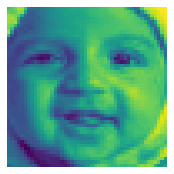

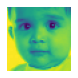

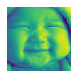

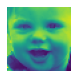

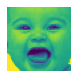

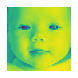

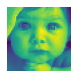

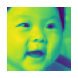

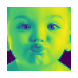

In [40]:
#Visualization
plt.figure(figsize=(10,10))
for index,image in enumerate(np.random.randint(0,1000,9)):
    plt.subplot(3,3,index+1)
    plt.imshow(x[image])
    plt.axis('off')
    plt.show()

In [43]:
#Training
y_gender=np.array(y['gender'])
y_ethnicity=np.array(y['ethnicity'])
y_age=np.array(y['age'])

In [44]:
y

,age,ethnicity,gender
0,0,2,0
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,0
...,...,...,...
23700,3,0,1
23701,3,1,1
23702,3,2,1
23703,3,2,1


In [55]:
def build_model(num_classes,activation='softmax',loss='sparse_categorical_crossentropy'):
    inputs=tf.keras.Input(shape=(img_height,img_width,1))
    x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255)(inputs)
    x=tf.keras.layers.Conv2D(16,3,padding='same',activation='relu')(x)
    x=tf.keras.layers.MaxPooling2D()(x)
    x=tf.keras.layers.Conv2D(32,3,padding='same',activation='relu')(x)
    x=tf.keras.layers.MaxPooling2D()(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(128,activation='relu')(x)
    outputs=tf.keras.layers.Dense(num_classes,activation=activation)(x)
    model=tf.keras.Model(inputs=inputs,outputs=outputs)
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [58]:
#training the model
x_gender_train,x_gender_test,y_gender_train,y_gender_test=train_test_split(x,y_gender,train_size=0.7)
x_ethnicity_train,x_ethnicity_test,y_ethnicity_train,y_ethnicity_test=train_test_split(x,y_ethnicity,train_size=0.7)
x_age_train,x_age_test,y_age_train,y_age_test=train_test_split(x,y_age,train_size=0.7)

In [63]:
#Gender Model
gender_model=build_model(1,activation='sigmoid',loss='binary_crossentropy')
gender_history=gender_model.fit(
    x_gender_train,
    y_gender_train,
    validation_split=0.2,
    batch_size=64,
    epochs=7,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0)

2022-04-07 03:26:28.800080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [65]:
fig=px.line(
    gender_history.history,
    y=['loss','val_loss'],
    labels={'index':'Epoch','value':'Loss'},
    title="Gender Model")
fig.show()


In [67]:
gender_acc=gender_model.evaluate(x_gender_test,y_gender_test)

223/223 [==============================] - 1s 5ms/step - loss: 0.2667 - accuracy: 0.8836


# Ethnicity Model

In [70]:
#Gender Model
ethnicity_model=build_model(5,activation='softmax',loss='sparse_categorical_crossentropy')
ethnicity_history=ethnicity_model.fit(
    x_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=64,
    epochs=7,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0)

In [71]:
fig=px.line(
    ethnicity_history.history,
    y=['loss','val_loss'],
    labels={'index':'Epoch','value':'Loss'},
    title="Ethnicity Model")
fig.show()


In [74]:
#Gender Model
age_model=build_model(4,activation='softmax',loss='sparse_categorical_crossentropy')
age_history=age_model.fit(
    x_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=64,
    epochs=7,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0)

In [76]:
fig=px.line(
    age_history.history,
    y=['loss','val_loss'],
    labels={'index':'Epoch','value':'Loss'},
    title="Age Model")
fig.show()


In [79]:
ethnicity_acc=ethnicity_model.evaluate(x_ethnicity_test,y_ethnicity_test)
age_acc=age_model.evaluate(x_age_test,y_age_test)

223/223 [==============================] - 1s 5ms/step - loss: 0.8363 - accuracy: 0.6243


In [80]:
print('Gender',gender_acc)
print('Ethnicity',ethnicity_acc)
print('Age',age_acc)

Gender [0.2666519284248352, 0.8835770487785339]
Ethnicity [0.7155883312225342, 0.7512654662132263]
Age [0.8363203406333923, 0.6242969632148743]
